 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [38]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [26]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)

# whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [8]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [28]:
# Drop nulls
# YOUR CODE HERE
whale_returns=whale_returns_df.dropna()
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [10]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
algo_returns_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df=algo_returns_df.dropna()
algo_returns_df.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
sp500_history_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [14]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "").astype("float")
sp500_history_df.dtypes


Close    float64
dtype: object

In [15]:
# Fix Data Types
# YOUR CODE HERE
sp500_return = sp500_history_df.pct_change()
sp500_return.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [16]:
# Calculate Daily Returns
# YOUR CODE HERE
spdaily_returns = sp500_history_df.pct_change()
spdaily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
# Drop nulls
# YOUR CODE HERE
spdaily_returns=spdaily_returns.dropna()
spdaily_returns.isnull().sum()


Close    0
dtype: int64

In [18]:
# Rename Column
# YOUR CODE HERE
sp500_return.rename(columns={"Close":"S&P 500"}, inplace=True)
sp500_return.head()


,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [43]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

combined_df = pd.concat([whale_returns_df, spdaily_returns, algo_returns_df], axis="columns", join="inner")
combined_df=combined_df.dropna()
combined_df.head()
#combined_df = pd.concat([whale_returns_df, sp500_history_df, algo_returns_df])
#combined_df.head


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

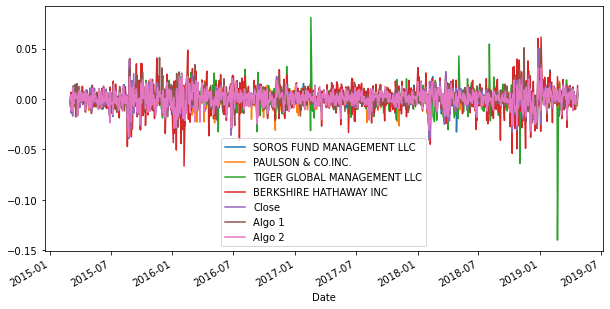

In [44]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(10,5))


In [45]:
# Calculate cumulative returns
# YOUR CODE HERE
cumulative_returns = (combined_df).cumprod() 
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-1.265508e-03,-4.980519e-03,-4.955323e-04,-6.568670e-03,-4.538606e-03,-1.942125e-03,-9.494828e-04
2015-03-04,-2.821971e-06,-1.614326e-05,1.255667e-06,-2.767393e-05,1.991769e-05,1.668053e-05,-2.294151e-06
2015-03-05,-1.133304e-08,-6.580078e-08,2.956666e-09,-1.861440e-07,2.382306e-08,-1.593072e-08,-9.917980e-09
2015-03-06,8.959174e-11,2.351742e-10,-2.507599e-11,2.438125e-09,-3.376664e-10,7.896446e-11,1.136632e-10
2015-03-09,5.216744e-14,9.937074e-13,-1.465124e-13,-4.028893e-12,-1.331911e-12,-4.301235e-13,1.481283e-13


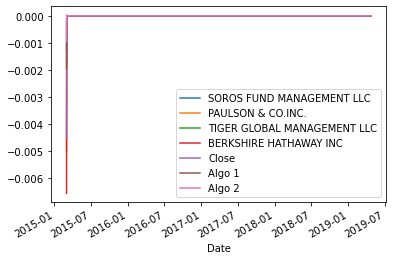

In [46]:
cumulative_returns.plot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

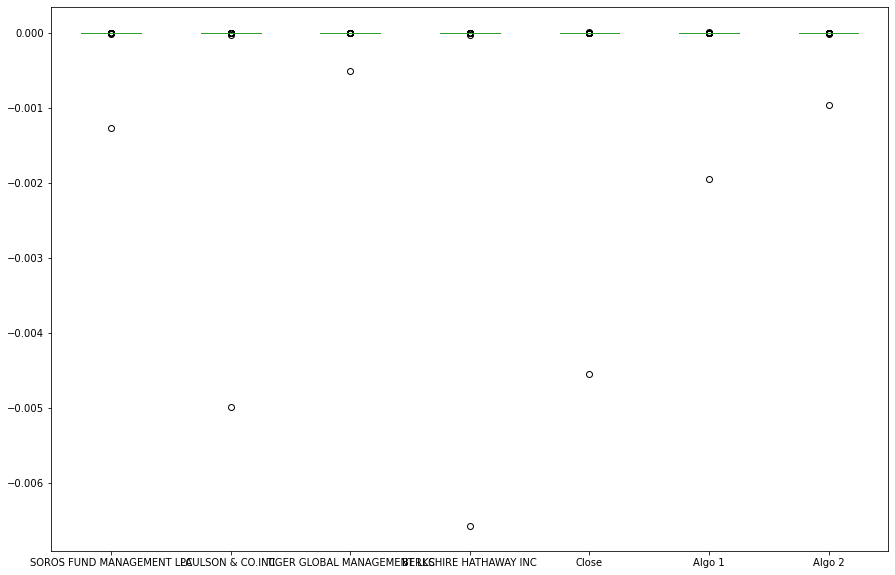

In [50]:
# Box plot to visually show risk
# YOUR CODE HERE
cumulative_returns.plot.box(figsize=(15,10))


In [53]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
standard_deviation_df = combined_df.std()
standard_deviation_df.head()
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
risky_df = standard_deviation_df[standard_deviation_df > standard_deviation_df["Close"]]
risky_df.head()

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [55]:
print (standard_deviation_df["Close"])

0.008553731597758204


In [56]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
risky_df = standard_deviation_df[standard_deviation_df > standard_deviation_df["Close"]]
risky_df.head()

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [57]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

standard_deviation_df * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Close                          0.135786
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

In [61]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_df = pd.concat([whale_returns_df, spdaily_returns], axis="columns", join="inner")
combined_df=combined_df.dropna()
rolling_df=combined_df.rolling(window=21).std()
rolling_df.dropna().head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
Date,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.009105
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.009095
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.009114
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.009246
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.008707


In [63]:
# Construct a correlation table
# YOUR CODE HERE
rolling_df.corr()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.664590,0.451969,0.859187,0.911914
PAULSON & CO.INC.,0.664590,1.000000,0.407927,0.631215,0.597760
TIGER GLOBAL MANAGEMENT LLC,0.451969,0.407927,1.000000,0.413311,0.414108
BERKSHIRE HATHAWAY INC,0.859187,0.631215,0.413311,1.000000,0.812766
Close,0.911914,0.597760,0.414108,0.812766,1.000000


In [64]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['Close'])
variance = combined_df['SOROS FUND MANAGEMENT LLC'].var()
SOROS_beta = covariance / variance
SOROS_beta


0.9077293681175369

In [67]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
combined_df.ewm(span=21)

EWM [com=10.0,min_periods=0,adjust=True,ignore_na=False,axis=0]

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [70]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharp=combined_df.mean()/combined_df.std()
sharp.head()

SOROS FUND MANAGEMENT LLC      0.022452
PAULSON & CO.INC.             -0.030462
TIGER GLOBAL MANAGEMENT LLC   -0.007626
BERKSHIRE HATHAWAY INC         0.039170
Close                          0.040837
dtype: float64

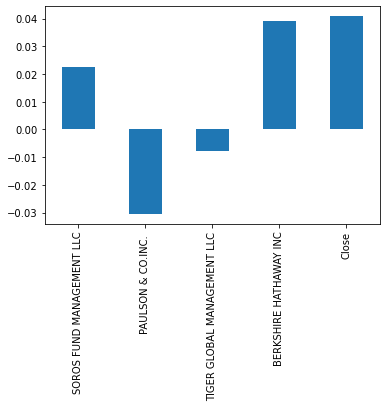

In [71]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharp.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [73]:
# Read the first stock
# YOUR CODE HERE
microsoft_returns_csv = Path("Resources/microsoft_returns.csv")
microsoft_df = pd.read_csv(microsoft_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
microsoft_df = microsoft_df.rename(columns = {"Close":"Microsoft"})
microsoft_df.head()

,Microsoft
Date,
2018-05-01 16:00:00,95.00
2018-05-02 16:00:00,93.51
2018-05-03 16:00:00,94.07
2018-05-04 16:00:00,95.16
2018-05-07 16:00:00,96.22


In [75]:
# Read the second stock
# YOUR CODE HERE
ford_returns_csv = Path("Resources/ford_returns.csv")
ford_df = pd.read_csv(ford_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
ford_df = ford_df.rename(columns = {"Close":"Ford"})
ford_df.head()

,Ford
Date,
2018-05-01 16:00:00,11.26
2018-05-02 16:00:00,11.21
2018-05-03 16:00:00,11.20
2018-05-04 16:00:00,11.36
2018-05-07 16:00:00,11.34


In [76]:
# Read the third stock
# YOUR CODE HERE
apple_returns_csv = Path("Resources/apple_returns.csv")
apple_df = pd.read_csv(apple_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
apple_df = apple_df.rename(columns = {"Close":"Apple"})
apple_df.head()

,Apple
Date,
2018-05-01 16:00:00,42.28
2018-05-02 16:00:00,44.14
2018-05-03 16:00:00,44.22
2018-05-04 16:00:00,45.96
2018-05-07 16:00:00,46.29


In [88]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
#combined_df = pd.concat([microsoft_returns_df, ford_returns_df, apple_returns_df], axis="columns", join="inner")
#combined_df.head()
column_append_data = pd.concat([microsoft_df, ford_df, apple_df], axis="columns", join = "inner")
column_append_data


,Microsoft,Ford,Apple
Date,,,
2018-05-01 16:00:00,95.00,11.26,42.28
2018-05-02 16:00:00,93.51,11.21,44.14
2018-05-03 16:00:00,94.07,11.20,44.22
2018-05-04 16:00:00,95.16,11.36,45.96
2018-05-07 16:00:00,96.22,11.34,46.29
...,...,...,...
2020-09-29 16:00:00,207.26,6.60,114.09
2020-09-30 16:00:00,210.33,6.66,115.81
2020-10-01 16:00:00,212.46,6.75,116.79


In [89]:
# Reset the index
# YOUR CODE HERE
column_append_data=column_append_data.reset_index()
column_append_data

,Date,Microsoft,Ford,Apple
0,2018-05-01 16:00:00,95.00,11.26,42.28
1,2018-05-02 16:00:00,93.51,11.21,44.14
2,2018-05-03 16:00:00,94.07,11.20,44.22
3,2018-05-04 16:00:00,95.16,11.36,45.96
4,2018-05-07 16:00:00,96.22,11.34,46.29
...,...,...,...,...
608,2020-09-29 16:00:00,207.26,6.60,114.09
609,2020-09-30 16:00:00,210.33,6.66,115.81
610,2020-10-01 16:00:00,212.46,6.75,116.79
611,2020-10-02 16:00:00,206.19,6.89,113.02


In [80]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE


In [85]:
# Drop Nulls
# YOUR CODE HERE
column_append_data.dropna()

,Date,Microsoft,Ford,Apple
0,2018-05-01 16:00:00,95.00,11.26,42.28
1,2018-05-02 16:00:00,93.51,11.21,44.14
2,2018-05-03 16:00:00,94.07,11.20,44.22
3,2018-05-04 16:00:00,95.16,11.36,45.96
4,2018-05-07 16:00:00,96.22,11.34,46.29
...,...,...,...,...
608,2020-09-29 16:00:00,207.26,6.60,114.09
609,2020-09-30 16:00:00,210.33,6.66,115.81
610,2020-10-01 16:00:00,212.46,6.75,116.79
611,2020-10-02 16:00:00,206.19,6.89,113.02


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [90]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
column_append_data[["Microsoft", "Ford", "Apple"]]/weights

,Microsoft,Ford,Apple
0,285.00,33.78,126.84
1,280.53,33.63,132.42
2,282.21,33.60,132.66
3,285.48,34.08,137.88
4,288.66,34.02,138.87
...,...,...,...
608,621.78,19.80,342.27
609,630.99,19.98,347.43
610,637.38,20.25,350.37
611,618.57,20.67,339.06


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [94]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_df = pd.concat([column_append_data,combined_df.reset_index()])
all_df

,Date,Microsoft,Ford,Apple,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
0,2018-05-01 16:00:00,95.00,11.26,42.28,NaN,NaN,NaN,NaN,NaN
1,2018-05-02 16:00:00,93.51,11.21,44.14,NaN,NaN,NaN,NaN,NaN
2,2018-05-03 16:00:00,94.07,11.20,44.22,NaN,NaN,NaN,NaN,NaN
3,2018-05-04 16:00:00,95.16,11.36,45.96,NaN,NaN,NaN,NaN,NaN
4,2018-05-07 16:00:00,96.22,11.34,46.29,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1038,2019-04-16 00:00:00,NaN,NaN,NaN,0.002699,0.000388,-0.000831,0.000837,0.000509
1039,2019-04-17 00:00:00,NaN,NaN,NaN,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
1040,2019-04-18 00:00:00,NaN,NaN,NaN,0.001448,0.001222,0.000582,0.001916,0.001579
1041,2019-04-22 00:00:00,NaN,NaN,NaN,-0.002586,-0.007333,-0.003640,-0.001088,0.001012


In [95]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_df.dropna()

,Date,Microsoft,Ford,Apple,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

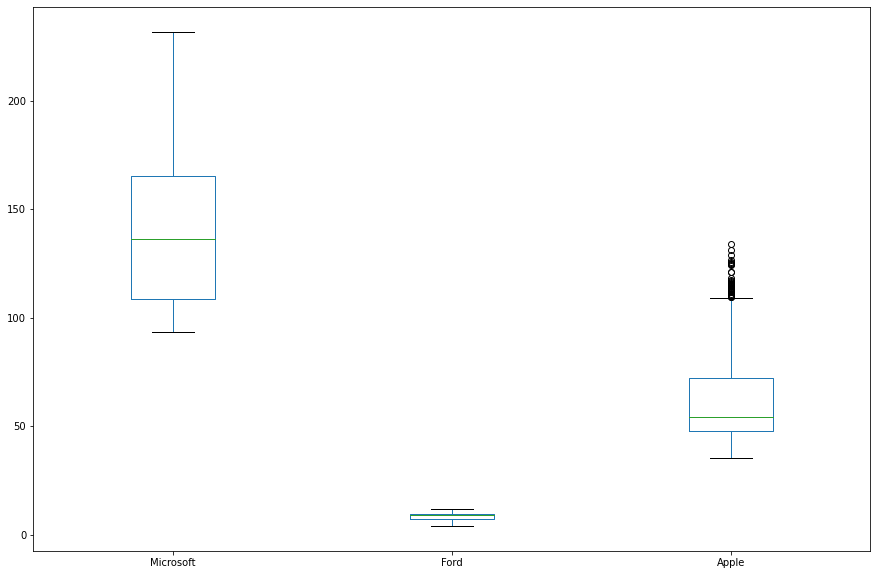

In [96]:
# Risk
# YOUR CODE HERE
column_append_data.plot.box(figsize=(15,10))

In [98]:
# Rolling
# YOUR CODE HERE
column_append_data.rolling(window=21).std().dropna()

,Microsoft,Ford,Apple
20,1.504617,0.152910,1.274359
21,1.496391,0.157141,0.864160
22,1.472100,0.169602,0.684672
23,1.539398,0.179902,0.436771
24,1.696540,0.200606,0.479746
...,...,...,...
608,8.907837,0.201492,7.619447
609,8.126064,0.207178,6.986783
610,7.009565,0.208900,5.484476
611,4.477473,0.208270,3.838138


In [99]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharp=column_append_data.mean()/column_append_data.std()
sharp.head()

Microsoft    3.942360
Ford         4.962768
Apple        3.001295
dtype: float64

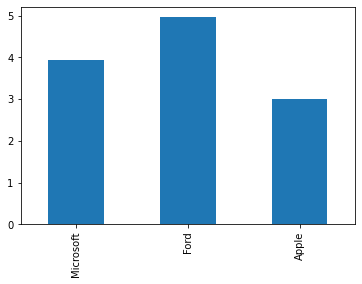

In [101]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharp.plot.bar()

In [102]:
# Create a correlation analysis
# YOUR CODE HERE
column_append_data.corr()

,Microsoft,Ford,Apple
Microsoft,1.000000,-0.696895,0.934002
Ford,-0.696895,1.000000,-0.590476
Apple,0.934002,-0.590476,1.000000


In [104]:
# Beta
# YOUR CODE HERE
covariance = column_append_data['Microsoft'].cov(column_append_data['Apple'])
variance = column_append_data['Microsoft'].var()
SOROS_beta = covariance / variance
SOROS_beta

0.543074935981832